In [1]:
# !pip install openpyxl==3.1

In [2]:
import pandas as pd 
import numpy as np 
import math

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def returns(P1, P2):
    R = ((P1-P2)/P2)
    return R

In [4]:
def logreturns(P1, P2):
    R = math.log(P2/P1)
    return R

In [5]:
def logreturns_dividends(P1, P2, D):
    R = math.log((P2+D)/P1)
    return R

In [6]:
def total_return_index(Ri1, P1, P2, D):
    Ri2 = Ri1*((P2+D)/P1)
    return Ri2

In [7]:
Pdata = pd.read_excel("DSB2_copy.xlsx", sheet_name="P#S")
# Pdata

In [8]:
static_data = pd.read_excel("DSB2_copy.xlsx", sheet_name="static")
# static_data

In [9]:
VOdata = pd.read_excel("DSB2_copy.xlsx", sheet_name="VO")
# VOdata

In [10]:
RIdata = pd.read_excel("DSB2_copy.xlsx", sheet_name="RI")
# RIdata

In [11]:
ESGdata = pd.read_excel("DSB2_Eikon_copy.xlsx", sheet_name="ESG")
ESGdata = ESGdata.rename(columns={"Unnamed: 0": "ISIN CODE"})
ESGdata

,ISIN CODE,ESG Score,Date,Financial Period Absolute
0,US30231G1022,80.252709,2009-12-31,FY2009
1,US30231G1022,85.638177,2010-12-31,FY2010
2,US30231G1022,85.460643,2011-12-31,FY2011
3,US30231G1022,82.231685,2012-12-31,FY2012
4,US30231G1022,80.417936,2013-12-31,FY2013
...,...,...,...,...
2336,JP3955800002,62.790439,2017-12-31,FY2017
2337,JP3955800002,64.336139,2018-12-31,FY2018
2338,JP3955800002,62.256024,2019-12-31,FY2019
2339,CA98936C8584,NaN,NaT,NaN


In [12]:
Eikon_data = pd.read_excel("DSB2_Eikon_copy.xlsx", sheet_name="Tabelle3")
Eikon_data = Eikon_data.drop(columns=["Unnamed: 0", "Unnamed: 2"])
Eikon_data

,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,2022-06-30 00:00:00,2022-09-30 00:00:00,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00
0,Company Common Name,TRBC Industry Name,ISIN,RIC,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close,Price Close
1,CIR SpA - Compagnie Industriali Riunite,"Auto, Truck & Motorcycle Parts",IT0000070786,CIRI.MI,0.422423,0.386571,0.465004,0.417845,0.412944,0.42703,0.475097,0.578184,0.63742,0.637978
2,Stellantis NV,Auto & Truck Manufacturers,NL00150001Q9,STLAM.MI,12.360328,12.02536,14.195205,18.140236,17.554195,19.248047,23.341022,28.418407,19.786812,13.815064
3,Pininfarina SpA,Auto & Truck Manufacturers,IT0003056386,PNNI.MI,0.844846,0.830957,0.896832,0.89097,0.920804,0.866743,0.87184,0.837073,0.812041,0.837277
4,Exco Technologies Ltd,"Auto, Truck & Motorcycle Parts",CA30150P1099,XTC.TO,6.207272,5.569217,5.683076,5.660377,6.029012,5.47249,5.949415,5.480869,5.812678,5.908015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,Schaeffler AG,"Auto, Truck & Motorcycle Parts",DE000SHA0019,SHA0.DE,5.660259,4.534987,6.811858,7.603594,6.158697,5.765958,6.174611,6.741888,5.758209,5.159495
1322,NaN,NaN,DE000SHA0019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1323,Wellysun Inc,"Auto, Truck & Motorcycle Parts",TW0006988009,6988.TW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,SAG Holdings Ltd,"Auto, Truck & Motorcycle Parts",KYG7776G1047,SAG.OQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
isin_code = ['Date']
for code in static_data["ISIN CODE"]:
    isin_code.append(code)

In [14]:
# isin_code

In [15]:
Pdata.columns = isin_code

In [16]:
dates = []
for date in Pdata["Date"]:
    dates.append(date)

In [17]:
Pdata_transposed = Pdata.transpose()
# Pdata_transposed

In [18]:
Pdata_transposed.columns = dates
Pdata_transposed.drop(index=Pdata_transposed.index[0], axis=0, inplace=True)
Pdata_transposed

,2010-01-01,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-01
US30231G1022,NaN,69.15,69.42,70.02,69.8,69.52,70.3,69.95,69.67,69.68,...,102.99,101.27,101.73,101.91,NaN,102.14,101.66,100.19,99.98,NaN
US1667641005,NaN,79.06,79.62,79.63,79.33,79.47,80.88,80.41,79.8,79.55,...,151.64,150.25,150.71,151.05,NaN,152.41,151.91,149.77,149.16,NaN
US20825C1045,NaN,40.0828,40.1209,40.4106,40.2505,40.6012,40.8375,39.9684,40.22,40.3877,...,116.49,116.69,116.83,117.66,NaN,119.02,118.49,116.5,116.07,NaN
US26875P1012,NaN,50.19,49.575,49.74,49.275,49.525,49.07,47.71,48.88,49.0,...,122.53,121.43,121.08,122.27,NaN,124.3,124.27,121.33,120.95,NaN
DE0005190003,NaN,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,31.83,...,101.04,99.87,99.33,100.36,NaN,NaN,100.28,100.66,100.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,NaN,30.12,30.4,30.12,30.61,30.35,30.71,30.57,30.58,30.78,...,18.96,19.2,19.0,19.26,NaN,NaN,19.02,18.78,18.96,NaN
CA98474P5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.83,0.85,0.85,0.85,NaN,NaN,0.86,0.88,0.87,NaN
JP3955800002,NaN,6.0,5.94,5.99,5.69,5.63,5.62,5.72,5.69,5.68,...,19.8,20.4,20.2,20.4,NaN,NaN,20.4,20.4,20.6,NaN
CA98936C8584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.03,0.03,0.03,NaN,NaN,0.03,0.03,0.03,NaN


In [19]:
VOdata.columns = isin_code
VOdata_transposed = VOdata.transpose()
VOdata_transposed.columns = dates
VOdata_transposed.drop(index=VOdata_transposed.index[0], axis=0, inplace=True)
VOdata_transposed

,2010-01-01,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-01
US30231G1022,NaN,27811.32,30178.59,35047.45,27194.13,24899.48,30684.92,31497.63,24884.99,18637.84,...,18904.66,20988.86,19250.93,12927.83,NaN,16835.14,14558.83,16329.25,17746.41,NaN
US1667641005,NaN,10174.31,10596.03,11014.85,9627.918,5625.078,11916.71,12176.14,10843.31,6720.984,...,8738.145,9369.988,7264.66,6396.078,NaN,5165.59,5337.242,8147.992,7658.637,NaN
US20825C1045,NaN,13880.89,10087.45,11632.32,7650.656,7284.16,8968.652,11307.71,9477.836,8835.523,...,6379.266,7767.195,4149.328,4299.453,NaN,2893.651,3441.412,3711.359,3643.582,NaN
US26875P1012,NaN,4109.93,4449.863,3650.213,4496.641,5911.258,3030.655,4477.0,4303.594,3175.628,...,3498.875,3671.278,3841.692,1742.029,NaN,1852.159,2568.378,2137.211,1756.736,NaN
DE0005190003,NaN,10.19,10.26,7.311999,4.058999,7.212,7.226,22.51599,10.958,10.705,...,3.512,1.256,0.806,1.43,NaN,NaN,0.554,0.339,0.297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,NaN,0.530972,0.749845,NaN,0.303991,0.121596,NaN,0.10133,0.10133,0.162129,...,0.939,5.006,1.781,1.581,NaN,NaN,2.571,1.348,0.383,NaN
CA98474P5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP3955800002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA98936C8584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
RIdata.columns = isin_code
RIdata_transposed = RIdata.transpose()
RIdata_transposed.columns = dates
RIdata_transposed.drop(index=RIdata_transposed.index[0], axis=0, inplace=True)
RIdata_transposed

,2010-01-01,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-01
US30231G1022,14241.48,14441.97,14498.36,14623.67,14577.73,14519.25,14682.15,14609.05,14550.58,14552.66,...,36688.29,36075.57,36239.44,36303.56,36303.56,36385.5,36214.5,35690.84,35616.04,35616.04
US1667641005,8469.31,8697.02,8758.63,8759.73,8726.73,8742.13,8897.23,8845.53,8778.43,8750.93,...,29004.41,28738.54,28826.52,28891.55,28891.55,29151.68,29056.05,28646.73,28530.05,28530.05
US20825C1045,5646.07,5813.01,5818.54,5860.55,5837.33,5888.19,5922.46,5796.43,5832.91,5857.23,...,27721.04,27768.64,27801.95,27999.47,27999.47,28323.11,28196.98,27723.42,27621.1,27621.1
US26875P1012,2182.92,2252.02,2224.43,2231.83,2210.96,2222.18,2201.77,2140.74,2196.49,2201.89,...,7278.13,7212.79,7192.0,7262.69,7262.69,7383.27,7381.48,7206.85,7184.28,7184.28
DE0005190003,5036.18,5044.05,5089.7,5161.3,5208.52,5149.5,5075.53,4902.41,4963.79,5009.43,...,27947.05,27623.43,27474.07,27758.96,27758.96,27758.96,27736.84,27841.95,27880.67,27880.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,665.34,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,711.54,...,894.21,905.53,896.1,908.36,908.36,908.36,897.04,885.72,894.21,894.21
CA98474P5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.33,56.33,56.67,56.33,56.33,56.33,57.0,58.33,58.0,58.0
JP3955800002,151.57,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,142.63,...,740.83,763.28,755.79,763.28,763.28,763.28,763.28,775.23,782.83,782.83
CA98936C8584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.25,0.25,0.24,0.24,0.24,0.25,0.25,0.23,0.23


In [21]:
Pdata_merge = Pdata_transposed.copy()
Pdata_merge['datatype']="P#S"
Pdata_merge

,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,...,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00,datatype
US30231G1022,NaN,69.15,69.42,70.02,69.8,69.52,70.3,69.95,69.67,69.68,...,101.27,101.73,101.91,NaN,102.14,101.66,100.19,99.98,NaN,P#S
US1667641005,NaN,79.06,79.62,79.63,79.33,79.47,80.88,80.41,79.8,79.55,...,150.25,150.71,151.05,NaN,152.41,151.91,149.77,149.16,NaN,P#S
US20825C1045,NaN,40.0828,40.1209,40.4106,40.2505,40.6012,40.8375,39.9684,40.22,40.3877,...,116.69,116.83,117.66,NaN,119.02,118.49,116.5,116.07,NaN,P#S
US26875P1012,NaN,50.19,49.575,49.74,49.275,49.525,49.07,47.71,48.88,49.0,...,121.43,121.08,122.27,NaN,124.3,124.27,121.33,120.95,NaN,P#S
DE0005190003,NaN,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,31.83,...,99.87,99.33,100.36,NaN,NaN,100.28,100.66,100.8,NaN,P#S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,NaN,30.12,30.4,30.12,30.61,30.35,30.71,30.57,30.58,30.78,...,19.2,19.0,19.26,NaN,NaN,19.02,18.78,18.96,NaN,P#S
CA98474P5013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.85,0.85,0.85,NaN,NaN,0.86,0.88,0.87,NaN,P#S
JP3955800002,NaN,6.0,5.94,5.99,5.69,5.63,5.62,5.72,5.69,5.68,...,20.4,20.2,20.4,NaN,NaN,20.4,20.4,20.6,NaN,P#S
CA98936C8584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.03,0.03,NaN,NaN,0.03,0.03,0.03,NaN,P#S


In [22]:
datatype_col = Pdata_merge.pop('datatype')
Pdata_merge.insert(0, 'datatype', datatype_col)
Pdata_merge

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
US30231G1022,P#S,NaN,69.15,69.42,70.02,69.8,69.52,70.3,69.95,69.67,...,102.99,101.27,101.73,101.91,NaN,102.14,101.66,100.19,99.98,NaN
US1667641005,P#S,NaN,79.06,79.62,79.63,79.33,79.47,80.88,80.41,79.8,...,151.64,150.25,150.71,151.05,NaN,152.41,151.91,149.77,149.16,NaN
US20825C1045,P#S,NaN,40.0828,40.1209,40.4106,40.2505,40.6012,40.8375,39.9684,40.22,...,116.49,116.69,116.83,117.66,NaN,119.02,118.49,116.5,116.07,NaN
US26875P1012,P#S,NaN,50.19,49.575,49.74,49.275,49.525,49.07,47.71,48.88,...,122.53,121.43,121.08,122.27,NaN,124.3,124.27,121.33,120.95,NaN
DE0005190003,P#S,NaN,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,...,101.04,99.87,99.33,100.36,NaN,NaN,100.28,100.66,100.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,P#S,NaN,30.12,30.4,30.12,30.61,30.35,30.71,30.57,30.58,...,18.96,19.2,19.0,19.26,NaN,NaN,19.02,18.78,18.96,NaN
CA98474P5013,P#S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.83,0.85,0.85,0.85,NaN,NaN,0.86,0.88,0.87,NaN
JP3955800002,P#S,NaN,6.0,5.94,5.99,5.69,5.63,5.62,5.72,5.69,...,19.8,20.4,20.2,20.4,NaN,NaN,20.4,20.4,20.6,NaN
CA98936C8584,P#S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.03,0.03,0.03,NaN,NaN,0.03,0.03,0.03,NaN


In [23]:
Pdata_merge.describe()

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
count,290,0,249.00,249.00,249.00,249.00,249.00,249.00,236.00,248.00,...,282.00,282.0,282.0,282.0,0,48.00,281.0,281.0,281.0,0
unique,1,0,232.00,229.00,228.00,226.00,223.00,226.00,218.00,229.00,...,233.00,232.0,233.0,235.0,0,47.00,236.0,233.0,234.0,0
top,P#S,NaN,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.0,0.0,0.0,NaN,3.41,0.0,0.0,0.0,NaN
freq,290,NaN,5.00,5.00,5.00,5.00,4.00,4.00,4.00,5.00,...,11.00,10.0,10.0,10.0,NaN,2.00,10.0,9.0,9.0,NaN


In [24]:
columns_to_drop = Pdata_merge.columns[Pdata_merge.isna().all()]
columns_to_drop

Index([2010-01-01 00:00:00, 2010-04-02 00:00:00, 2010-12-24 00:00:00,
       2011-04-22 00:00:00, 2011-12-26 00:00:00, 2012-04-06 00:00:00,
       2012-12-25 00:00:00, 2013-01-01 00:00:00, 2013-03-29 00:00:00,
       2013-12-25 00:00:00, 2014-01-01 00:00:00, 2014-04-18 00:00:00,
       2014-12-25 00:00:00, 2015-01-01 00:00:00, 2015-04-03 00:00:00,
       2015-12-25 00:00:00, 2016-01-01 00:00:00, 2016-03-25 00:00:00,
       2016-12-26 00:00:00, 2017-04-14 00:00:00, 2017-12-25 00:00:00,
       2018-01-01 00:00:00, 2018-03-30 00:00:00, 2018-12-25 00:00:00,
       2019-01-01 00:00:00, 2019-04-19 00:00:00, 2019-12-25 00:00:00,
       2020-01-01 00:00:00, 2020-04-10 00:00:00, 2020-12-25 00:00:00,
       2021-01-01 00:00:00, 2021-04-02 00:00:00, 2021-12-24 00:00:00,
       2022-04-15 00:00:00, 2022-12-26 00:00:00, 2023-04-07 00:00:00,
       2023-12-25 00:00:00, 2024-01-01 00:00:00],
      dtype='object')

In [25]:
VOdata_merge = VOdata_transposed.copy()
VOdata_merge['datatype']="VO"
datatype_col = VOdata_merge.pop('datatype')
VOdata_merge.insert(0, 'datatype', datatype_col)
VOdata_merge

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
US30231G1022,VO,NaN,27811.32,30178.59,35047.45,27194.13,24899.48,30684.92,31497.63,24884.99,...,18904.66,20988.86,19250.93,12927.83,NaN,16835.14,14558.83,16329.25,17746.41,NaN
US1667641005,VO,NaN,10174.31,10596.03,11014.85,9627.918,5625.078,11916.71,12176.14,10843.31,...,8738.145,9369.988,7264.66,6396.078,NaN,5165.59,5337.242,8147.992,7658.637,NaN
US20825C1045,VO,NaN,13880.89,10087.45,11632.32,7650.656,7284.16,8968.652,11307.71,9477.836,...,6379.266,7767.195,4149.328,4299.453,NaN,2893.651,3441.412,3711.359,3643.582,NaN
US26875P1012,VO,NaN,4109.93,4449.863,3650.213,4496.641,5911.258,3030.655,4477.0,4303.594,...,3498.875,3671.278,3841.692,1742.029,NaN,1852.159,2568.378,2137.211,1756.736,NaN
DE0005190003,VO,NaN,10.19,10.26,7.311999,4.058999,7.212,7.226,22.51599,10.958,...,3.512,1.256,0.806,1.43,NaN,NaN,0.554,0.339,0.297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,VO,NaN,0.530972,0.749845,NaN,0.303991,0.121596,NaN,0.10133,0.10133,...,0.939,5.006,1.781,1.581,NaN,NaN,2.571,1.348,0.383,NaN
CA98474P5013,VO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP3955800002,VO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA98936C8584,VO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
RIdata_merge = RIdata_transposed.copy()
RIdata_merge['datatype']="RI"
datatype_col = RIdata_merge.pop('datatype')
RIdata_merge.insert(0, 'datatype', datatype_col)
RIdata_merge

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
US30231G1022,RI,14241.48,14441.97,14498.36,14623.67,14577.73,14519.25,14682.15,14609.05,14550.58,...,36688.29,36075.57,36239.44,36303.56,36303.56,36385.5,36214.5,35690.84,35616.04,35616.04
US1667641005,RI,8469.31,8697.02,8758.63,8759.73,8726.73,8742.13,8897.23,8845.53,8778.43,...,29004.41,28738.54,28826.52,28891.55,28891.55,29151.68,29056.05,28646.73,28530.05,28530.05
US20825C1045,RI,5646.07,5813.01,5818.54,5860.55,5837.33,5888.19,5922.46,5796.43,5832.91,...,27721.04,27768.64,27801.95,27999.47,27999.47,28323.11,28196.98,27723.42,27621.1,27621.1
US26875P1012,RI,2182.92,2252.02,2224.43,2231.83,2210.96,2222.18,2201.77,2140.74,2196.49,...,7278.13,7212.79,7192.0,7262.69,7262.69,7383.27,7381.48,7206.85,7184.28,7184.28
DE0005190003,RI,5036.18,5044.05,5089.7,5161.3,5208.52,5149.5,5075.53,4902.41,4963.79,...,27947.05,27623.43,27474.07,27758.96,27758.96,27758.96,27736.84,27841.95,27880.67,27880.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,RI,665.34,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,...,894.21,905.53,896.1,908.36,908.36,908.36,897.04,885.72,894.21,894.21
CA98474P5013,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.33,56.33,56.67,56.33,56.33,56.33,57.0,58.33,58.0,58.0
JP3955800002,RI,151.57,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,...,740.83,763.28,755.79,763.28,763.28,763.28,763.28,775.23,782.83,782.83
CA98936C8584,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.25,0.25,0.24,0.24,0.24,0.25,0.25,0.23,0.23


In [27]:
combined_df = pd.concat([Pdata_merge, VOdata_merge, RIdata_merge], ignore_index=False)
combined_df

,datatype,2010-01-01 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,...,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2024-01-01 00:00:00
US30231G1022,P#S,NaN,69.15,69.42,70.02,69.8,69.52,70.3,69.95,69.67,...,102.99,101.27,101.73,101.91,NaN,102.14,101.66,100.19,99.98,NaN
US1667641005,P#S,NaN,79.06,79.62,79.63,79.33,79.47,80.88,80.41,79.8,...,151.64,150.25,150.71,151.05,NaN,152.41,151.91,149.77,149.16,NaN
US20825C1045,P#S,NaN,40.0828,40.1209,40.4106,40.2505,40.6012,40.8375,39.9684,40.22,...,116.49,116.69,116.83,117.66,NaN,119.02,118.49,116.5,116.07,NaN
US26875P1012,P#S,NaN,50.19,49.575,49.74,49.275,49.525,49.07,47.71,48.88,...,122.53,121.43,121.08,122.27,NaN,124.3,124.27,121.33,120.95,NaN
DE0005190003,P#S,NaN,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,...,101.04,99.87,99.33,100.36,NaN,NaN,100.28,100.66,100.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,RI,665.34,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,...,894.21,905.53,896.1,908.36,908.36,908.36,897.04,885.72,894.21,894.21
CA98474P5013,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.33,56.33,56.67,56.33,56.33,56.33,57.0,58.33,58.0,58.0
JP3955800002,RI,151.57,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,...,740.83,763.28,755.79,763.28,763.28,763.28,763.28,775.23,782.83,782.83
CA98936C8584,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.25,0.25,0.24,0.24,0.24,0.25,0.25,0.23,0.23


In [28]:
combined_df_cleaned = combined_df.copy()
combined_df_cleaned = combined_df_cleaned.drop(columns=columns_to_drop)
combined_df_cleaned

,datatype,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-06 00:00:00,2010-01-07 00:00:00,2010-01-08 00:00:00,2010-01-11 00:00:00,2010-01-12 00:00:00,2010-01-13 00:00:00,2010-01-14 00:00:00,...,2023-12-15 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
US30231G1022,P#S,69.15,69.42,70.02,69.8,69.52,70.3,69.95,69.67,69.68,...,100.9,101.65,102.99,101.27,101.73,101.91,102.14,101.66,100.19,99.98
US1667641005,P#S,79.06,79.62,79.63,79.33,79.47,80.88,80.41,79.8,79.55,...,149.35,149.68,151.64,150.25,150.71,151.05,152.41,151.91,149.77,149.16
US20825C1045,P#S,40.0828,40.1209,40.4106,40.2505,40.6012,40.8375,39.9684,40.22,40.3877,...,114.54,114.9,116.49,116.69,116.83,117.66,119.02,118.49,116.5,116.07
US26875P1012,P#S,50.19,49.575,49.74,49.275,49.525,49.07,47.71,48.88,49.0,...,120.11,121.62,122.53,121.43,121.08,122.27,124.3,124.27,121.33,120.95
DE0005190003,P#S,32.05,32.34,32.795,33.095,32.72,32.25,31.15,31.54,31.83,...,102.72,101.5,101.04,99.87,99.33,100.36,NaN,100.28,100.66,100.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU0000224040,RI,696.37,702.76,696.48,707.66,701.62,710.06,706.87,706.98,711.54,...,880.06,884.78,894.21,905.53,896.1,908.36,908.36,897.04,885.72,894.21
CA98474P5013,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.0,54.67,55.33,56.33,56.67,56.33,56.33,57.0,58.33,58.0
JP3955800002,RI,150.51,149.16,150.26,142.68,141.38,140.93,143.54,142.73,142.63,...,755.79,755.79,740.83,763.28,755.79,763.28,763.28,763.28,775.23,782.83
CA98936C8584,RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.22,0.23,0.22,0.25,0.25,0.24,0.24,0.25,0.25,0.23


In [29]:
combined_df_cleaned.to_csv('P_VO_RI.csv')
ESGdata.to_csv('esg_data.csv')
Eikon_data.to_csv('Eikon_data.csv')

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7834: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


Plot Time Series

In [30]:
import matplotlib.pyplot as plt 

In [31]:
df = combined_df_cleaned.copy()

In [32]:
df_grouped = df.groupby('datatype').mean()

In [33]:
df_grouped

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
datatype,,,,,,,,,,,,,,,,,,,,,
P#S,63.078849,65.435666,65.176902,68.834053,68.351777,70.19134,71.084737,67.434225,68.734376,68.53213,...,21.781464,21.822526,21.916363,21.869236,21.869609,21.974897,49.553852,22.18802,21.967589,21.904436
RI,846.226996,854.639209,859.641028,860.358972,862.41332,862.733399,852.334822,851.378538,850.657628,842.622253,...,2862.751966,2872.631448,2901.353862,2877.567552,2887.479172,2889.510759,2916.904241,2917.028897,2870.413621,2843.960241
VO,1614.585131,3081.454862,3227.383228,2166.315786,2113.08931,2615.637843,2509.686125,2470.00521,2028.100582,2138.465942,...,4588.55582,2157.889852,1897.041005,2296.867004,2360.65214,1758.604269,2623.434512,1293.145604,1293.551736,1740.584433


In [34]:
df_gr_transposed = df_grouped.transpose()
df_gr_transposed

datatype,P#S,RI,VO
2010-01-04 00:00:00,63.078849,846.226996,1614.585131
2010-01-05 00:00:00,65.435666,854.639209,3081.454862
2010-01-06 00:00:00,65.176902,859.641028,3227.383228
2010-01-07 00:00:00,68.834053,860.358972,2166.315786
2010-01-08 00:00:00,68.351777,862.41332,2113.08931
...,...,...,...
2023-12-22 00:00:00,21.974897,2889.510759,1758.604269
2023-12-26 00:00:00,49.553852,2916.904241,2623.434512
2023-12-27 00:00:00,22.18802,2917.028897,1293.145604
2023-12-28 00:00:00,21.967589,2870.413621,1293.551736


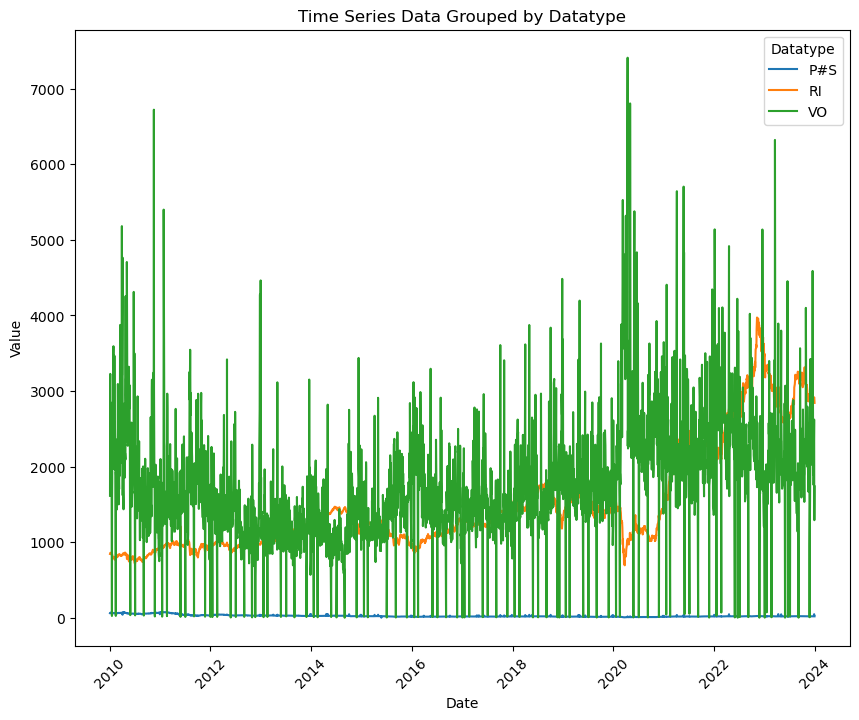

In [35]:
plt.figure(figsize=(10,8))

plt.plot(df_gr_transposed.index, df_gr_transposed.values, label = [data for data in df_gr_transposed])

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Grouped by Datatype')
plt.xticks(rotation=45)
plt.legend(title='Datatype')
plt.show()

In [36]:
def plot_lineplot(row):
    plt.figure(figsize=(10,5))

    plt.plot(df_gr_transposed[row], label = row)

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Time Series Data Grouped by Datatype {row}')
    plt.xticks(rotation=45)
    plt.legend(title='Datatype')
    plt.grid(axis='y')
    plt.show()

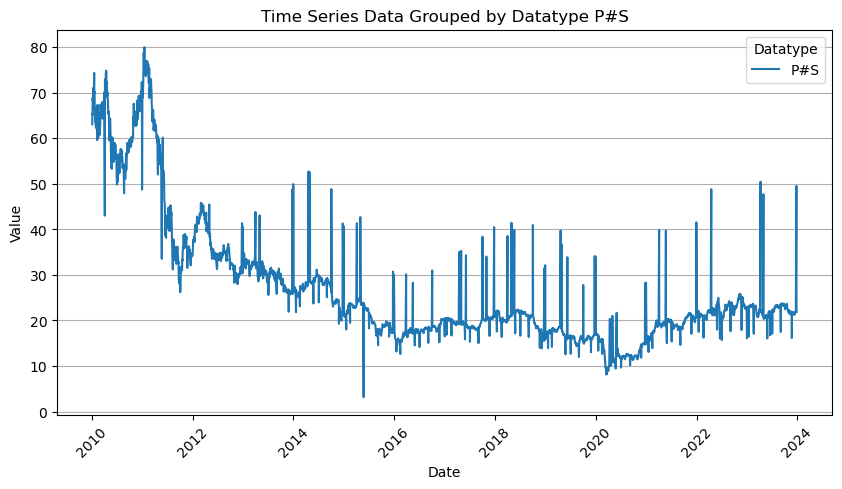

In [37]:
plot_lineplot('P#S')

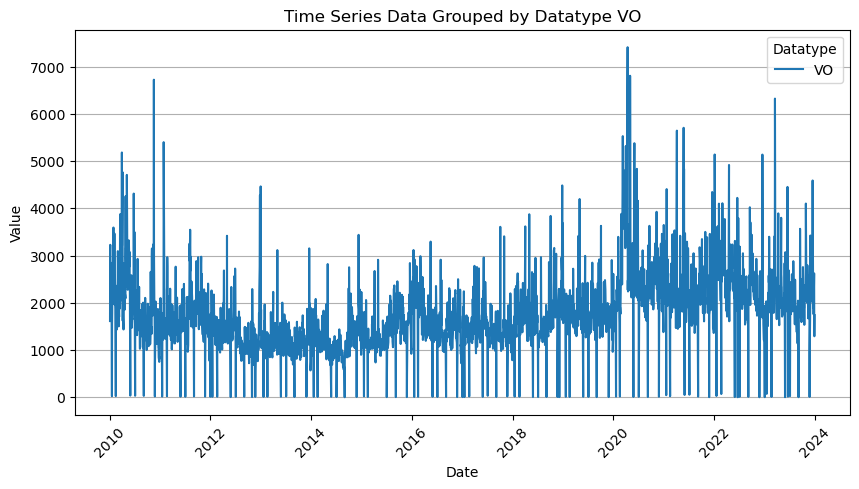

In [38]:
plot_lineplot('VO')

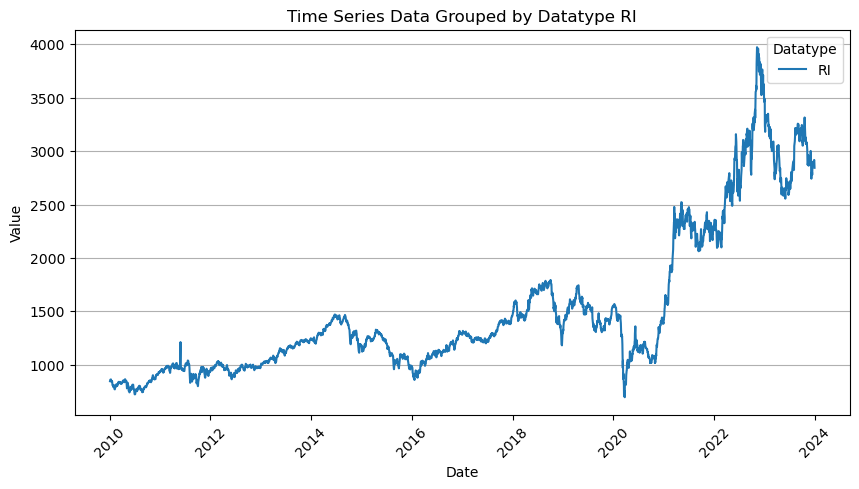

In [39]:
plot_lineplot('RI')